In [1]:
#ABOUT THE DATASET 
#Our dataset has 311 rows and 35 columns, containing detailed HR records about employees. 
#Each row corresponds to one employee. 
#Columns cover personal details employment history, performance, and survey data. 
#Mixed data types: integers,text, dates, and survey scores

In [2]:
#COLUMNS DESCRIPTIONS- IDENTIFIERS & PERSONAL INFO
#Employee_name - employees full name.
#EmpID – Unique employee ID.
#DOB – Date of birth.
#Sex – Gender(M/f).
#MaritalDesc – Marital status(e.g.,Single,married).


In [3]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [4]:
#load data & quick inspect
a=pd.read_csv("HRDatasets.csv")
#to remove extra white spaces i.e."DateofTemination " beacomes"DateofTemination"
a.columns=a.columns.str.strip()

In [5]:
#quick looks
print(a)
print(a.head())
print(a.tail())

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [6]:
print("\nDataFrame info():")
a.info()


DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State           

In [7]:
print("\nMissing values per column:")
print(a.isnull().sum())


Missing values per column:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource   

In [8]:
#salary to float(coerce avaoid crashes if any stray text is present)
a['Salary']=pd.to_numeric(a['Salary'],errors='coerce')

#Dates parsed as day-first to match your format strings
a['DateofHire']=pd.to_datetime(a['DateofHire'],format='%d-%m-%Y',errors='coerce')
a['DOB']=pd.to_datetime(a['DOB'],format='%d-%m-%Y',errors='coerce')
a['DateofTermination']=pd.to_datetime(a['DateofTermination'],format='%d-%m-%Y',errors='coerce')
a['LastPerformanceReview_Date']=pd.to_datetime(a['LastPerformanceReview_Date'],format='%d-%m-%Y',errors='coerce')



In [9]:
print("\nDescribe(numeric columns):")
print(a.select_dtypes(include=[np.number]).describe())
#Frequency tables
print("\nMarital Data")
print(a['MaritalDesc'].value_counts())
print("\nDepartment Data")
print(a['Department'].value_counts())
print("\nPosition Data")
print(a['Position'].value_counts())
print("\nManager Data")
print(a['ManagerName'].value_counts())


Describe(numeric columns):
              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25

In [10]:
#Metrics
total_employees=len(a)
print(f'\ntotal Employees:{total_employees}')


total Employees:311


In [11]:
#Fill missing termination dates with the sentinel string
a['DateofTermination']=a['DateofTermination'].astype('object')
a['DateofTermination']=a['DateofTermination'].where(a['DateofTermination'].notna(),'CurrentlyWorking')
print("\nDateofTermination column values")
print(a['DateofTermination'])


DateofTermination column values
0         CurrentlyWorking
1      2016-06-16 00:00:00
2      2012-09-24 00:00:00
3         CurrentlyWorking
4      2016-06-09 00:00:00
              ...         
306       CurrentlyWorking
307    2015-09-29 00:00:00
308       CurrentlyWorking
309       CurrentlyWorking
310       CurrentlyWorking
Name: DateofTermination, Length: 311, dtype: object


In [12]:
#counts based on your sentinel logic
employees_left_count=(a['DateofTermination']!='CurrentlyWorking').sum()
print(f"\nNumber of employees who have left:{employees_left_count}")
currently_working_count=(a['DateofTermination']=='CurrentlyWorking').sum()
print(f"\nNumber of employees currently working:{currently_working_count}")


Number of employees who have left:104

Number of employees currently working:207


In [13]:
#distinct departments
total_departments=a['Department'].nunique()
print(f'Total Departments:{total_departments}')

Total Departments:6


In [14]:
#average salary
average_salary=a['Salary'].mean()
print(f'Average Salary:Rs{average_salary:.2f}')

Average Salary:Rs69020.68


In [15]:
#Tenure(years)from DateofHire
now_ts=pd.Timestamp(datetime.now())
a['YearWithCompany']=(now_ts-a['DateofHire']).dt.days/365.25
average_years_with_company=a['YearWithCompany'].mean()
print(f'Average Year with Company:{average_years_with_company:.2f}')

Average Year with Company:12.54


In [16]:
#Age(years)from DOB
a['Age']=(now_ts-a['DOB']).dt.days/365.25
average_age=a['Age'].mean()
print(f'Average Age:{average_age:.2f}')

Average Age:46.16


In [17]:
#Attrition rate(your formula)
attrition_rate=(employees_left_count/total_employees)*100
print(f'attrition Rate:{attrition_rate:.2f}%')

attrition Rate:33.44%


In [18]:
attrition_rate=(employees_left_count/total_employees)*100
print(f'attrition_rate:{attrition_rate:.2f}%')

attrition_rate:33.44%


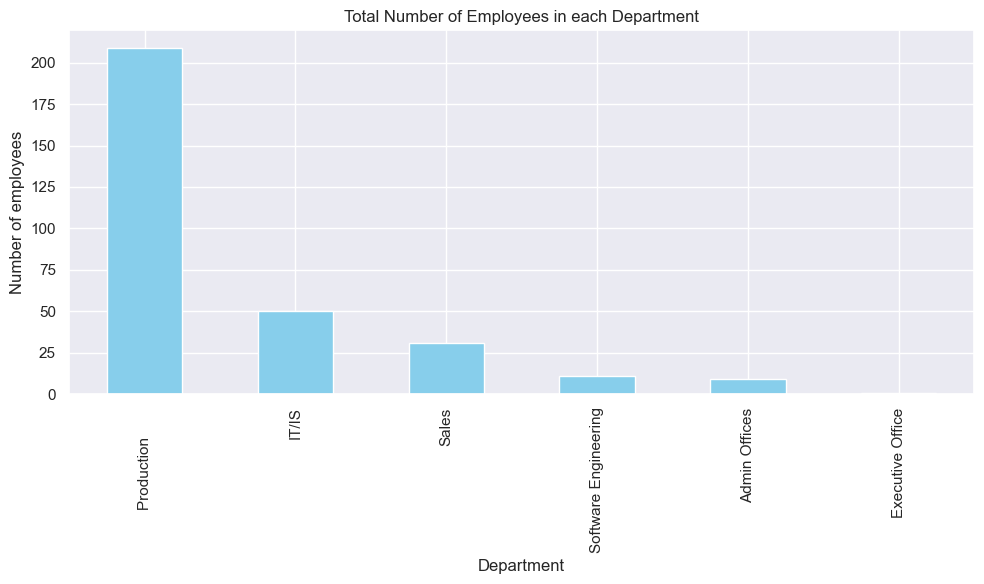

In [19]:
#lets start data visualization
#bar:employees per Department
department_counts=a['Department'].value_counts()
plt.figure(figsize=(10,6))
department_counts.plot(kind='bar',color='skyblue')
plt.title('Total Number of Employees in each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.savefig('HR1')
plt.tight_layout()
plt.show()

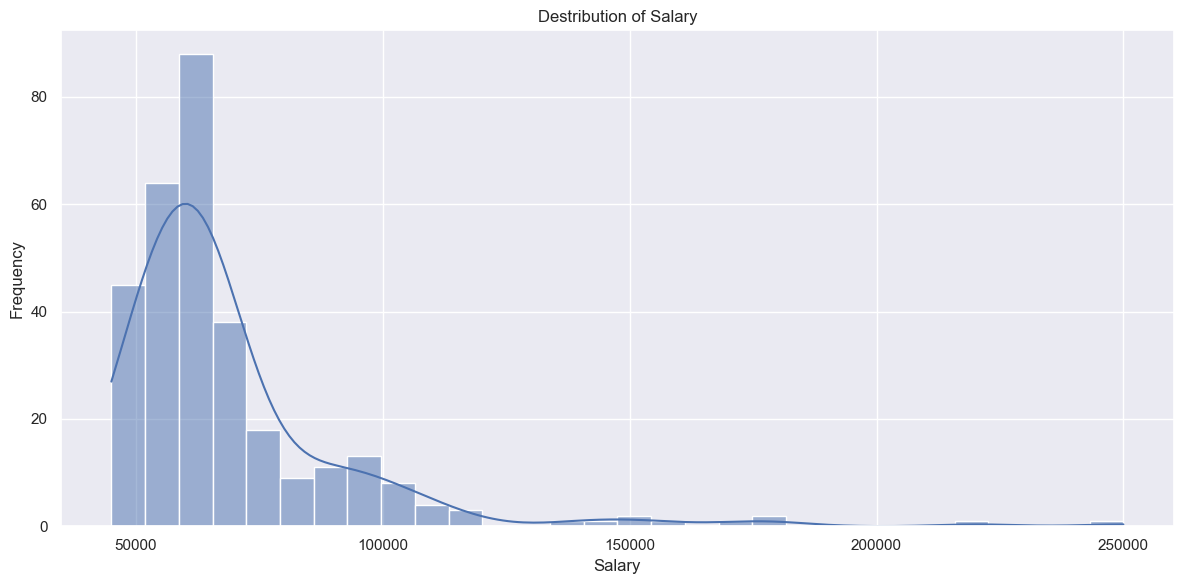

In [20]:
#histogram of salary
plt.figure(figsize=(12,6))
sns.histplot(a['Salary'],bins=30,kde=True)
plt.title('Destribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.savefig('HR2')
plt.tight_layout()
plt.show()

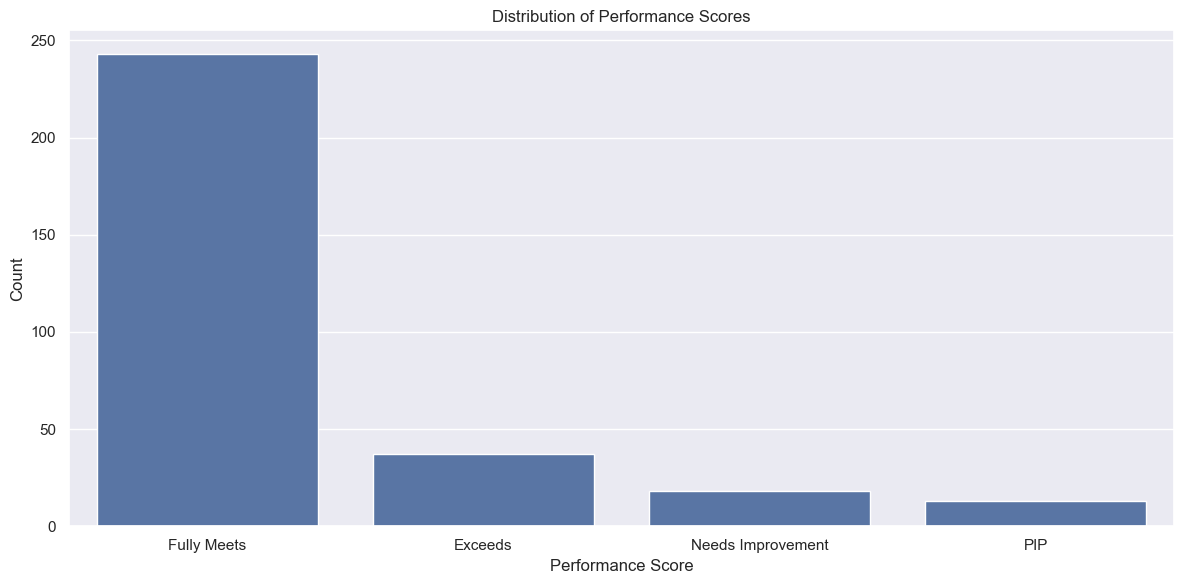

In [21]:
#COUNTPLOT:performanceScore
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='PerformanceScore',order=a['PerformanceScore'].value_counts().index)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_17324\3569874494.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=a,x='Department',y='Salary',estimator=np.mean,ci=None)


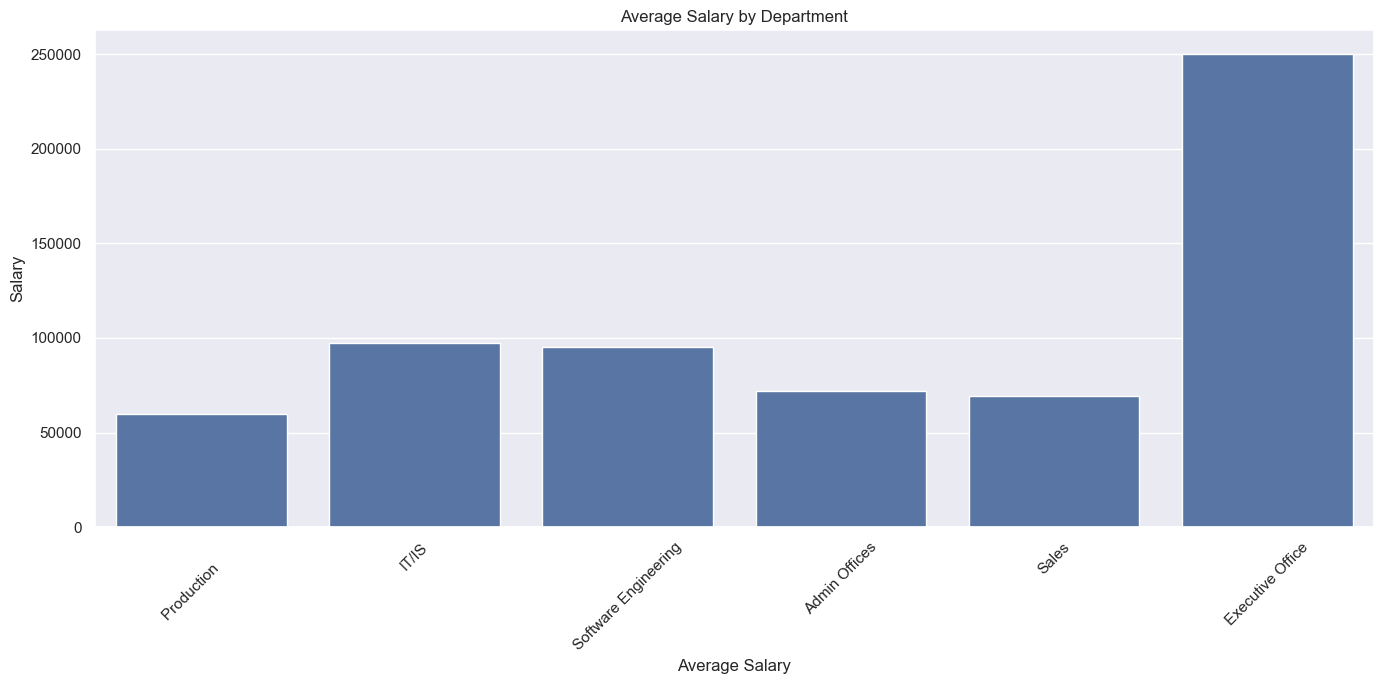

In [22]:
#Bar: average Salary by Department
plt.figure(figsize=(14,7))
sns.barplot(data=a,x='Department',y='Salary',estimator=np.mean,ci=None)
plt.title('Average Salary by Department')
plt.xlabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

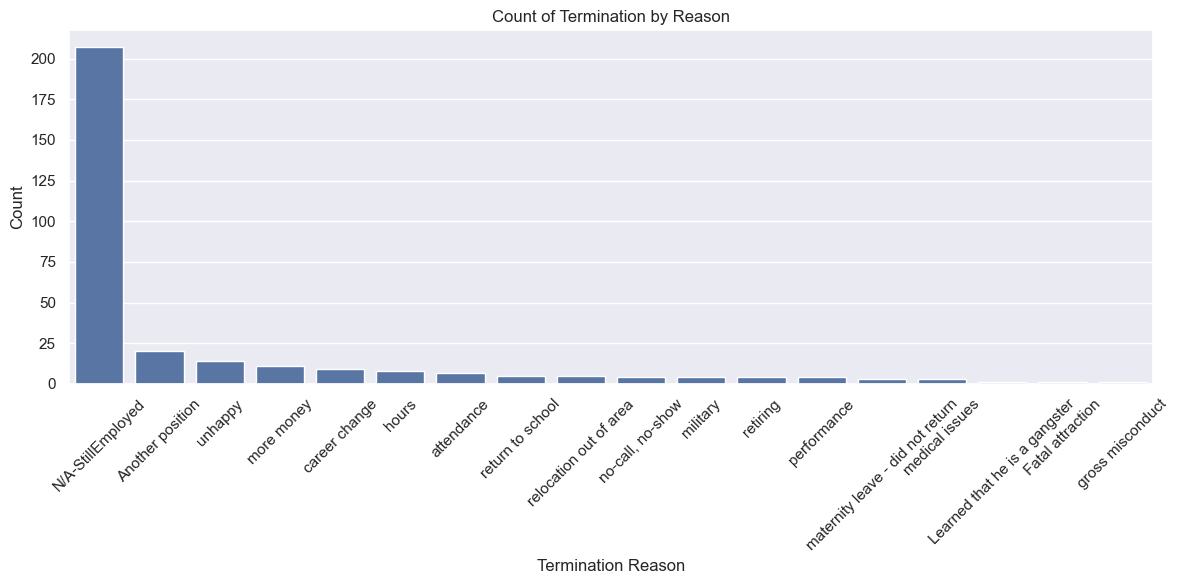

In [23]:
#countplot:Termination by Reason
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='TermReason',order=a['TermReason'].value_counts().index)
plt.title('Count of Termination by Reason')
plt.xlabel('Termination Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

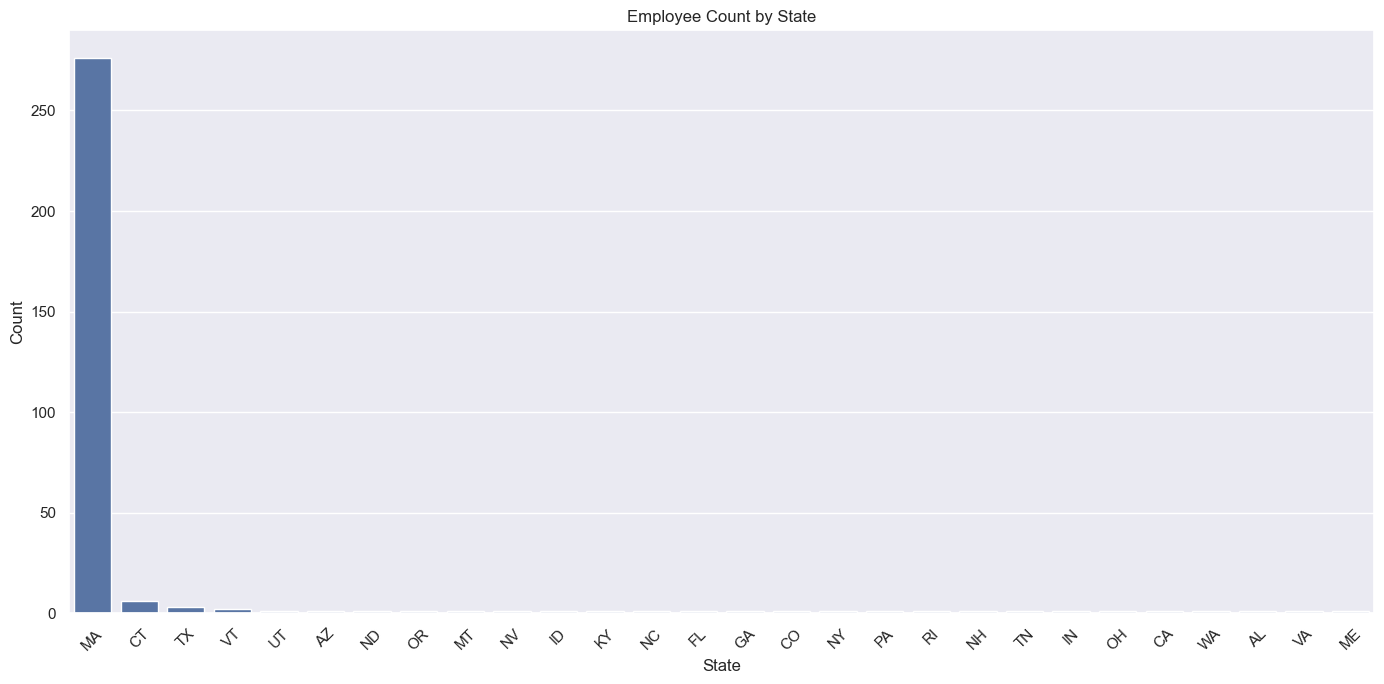

In [24]:
#countplot:Employee Count by State
plt.figure(figsize=(14,7))
sns.countplot(data=a,x='State',order=a['State'].value_counts().index)
plt.title('Employee Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

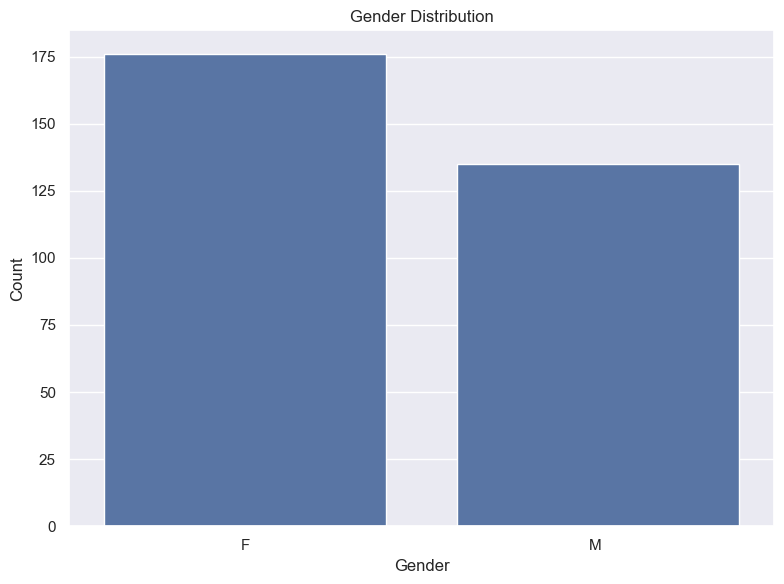

In [25]:
#countplot:Gender Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=a,x='Sex',order=a['Sex'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

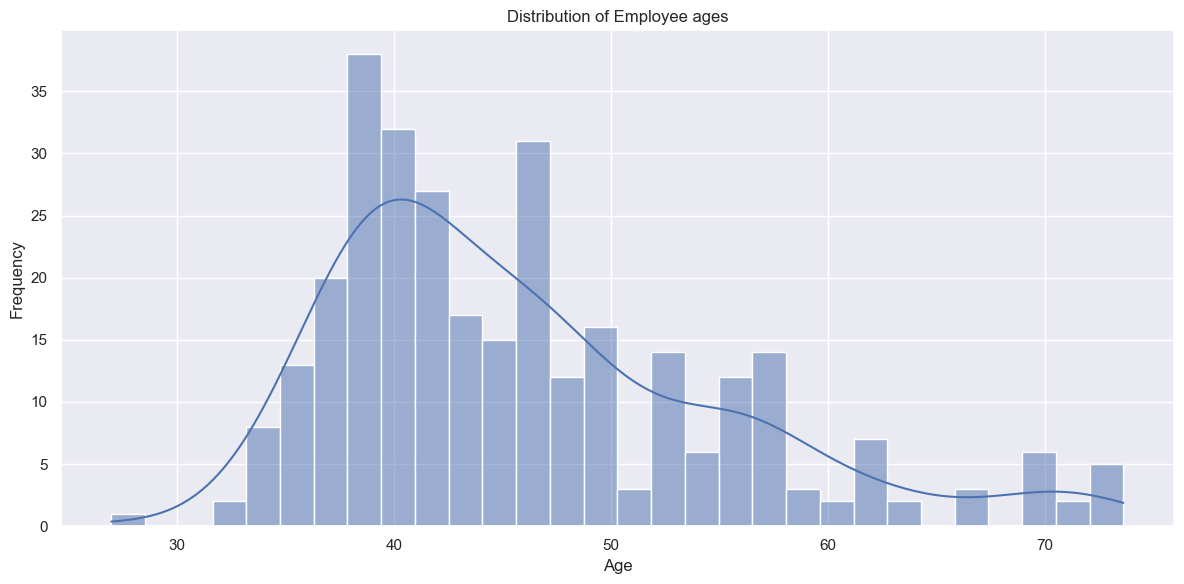

In [26]:
#Histogram of Ages
plt.figure(figsize=(12,6))
sns.histplot(a['Age'],bins=30,kde=True)
plt.title('Distribution of Employee ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('HR3')
plt.tight_layout()
plt.show()

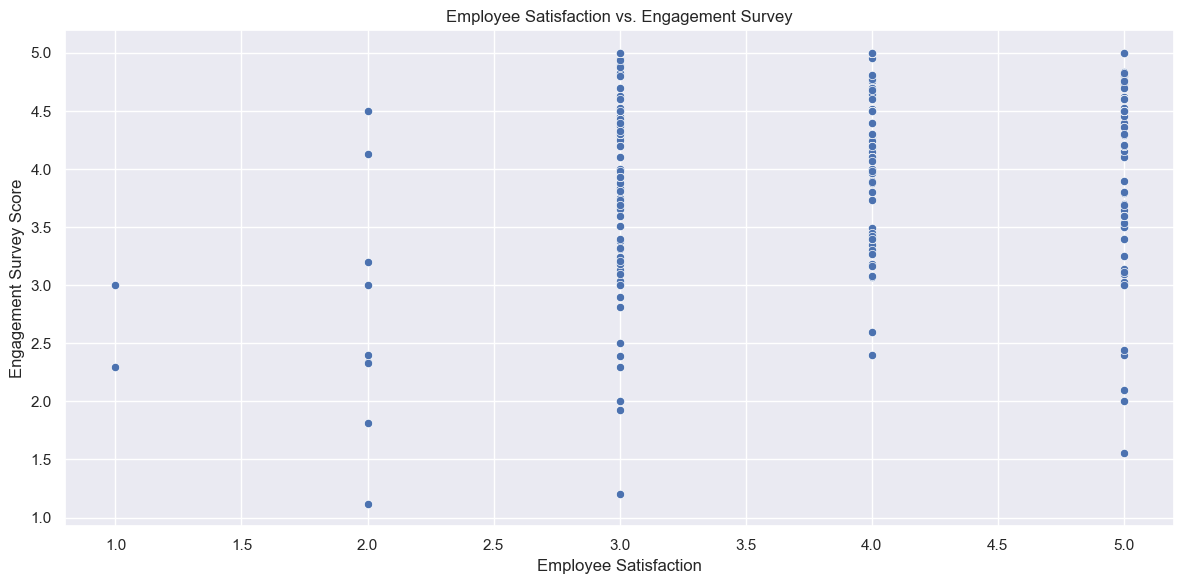

In [27]:
# Scatter: Satisfaction vs Engagement
plt.figure(figsize=(12,6))
sns.scatterplot(data=a, x='EmpSatisfaction', y='EngagementSurvey')
plt.title('Employee Satisfaction vs. Engagement Survey')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Engagement Survey Score')
plt.savefig('HR4')
plt.tight_layout()
plt.show()


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_17324\2013579925.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=a, x='Department', y='Absences', estimator=np.sum, ci=None)


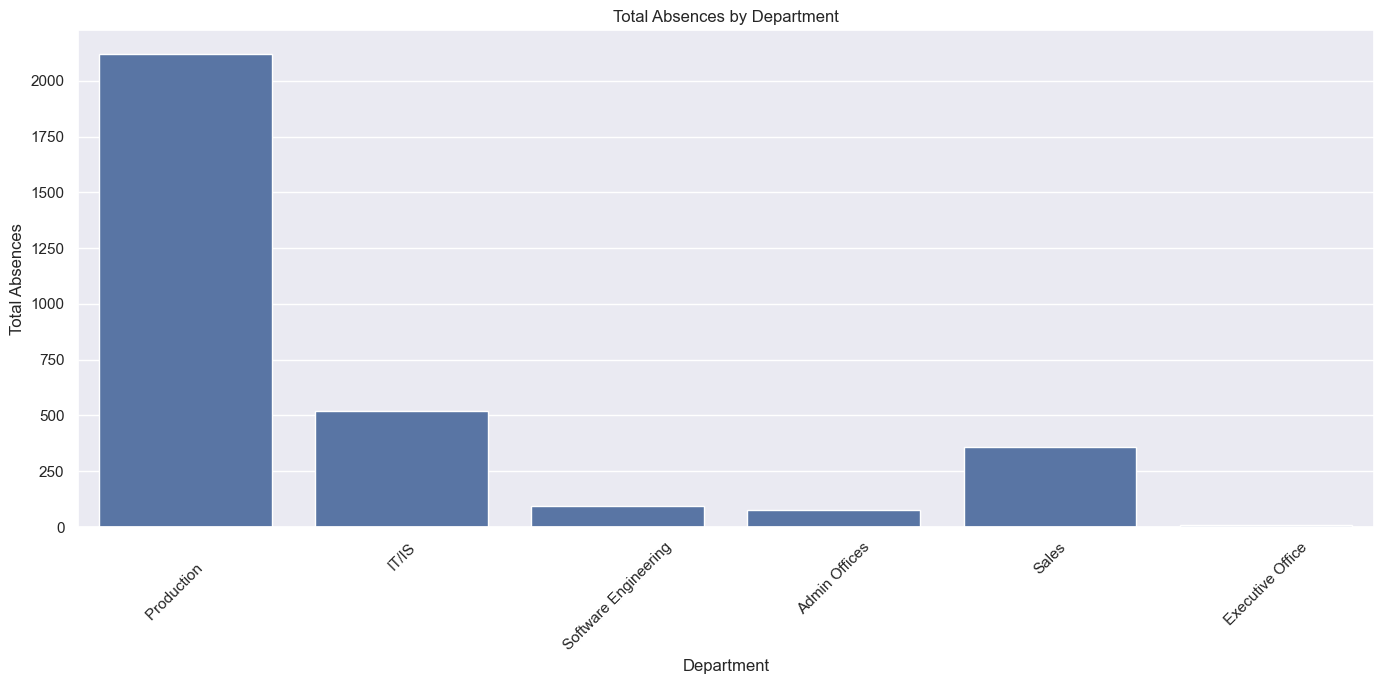

In [28]:
#bar: total absences by department
plt.figure(figsize=(14,7))
sns.barplot(data=a, x='Department', y='Absences', estimator=np.sum, ci=None)
plt.title('Total Absences by Department')
plt.xlabel('Department')
plt.ylabel('Total Absences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



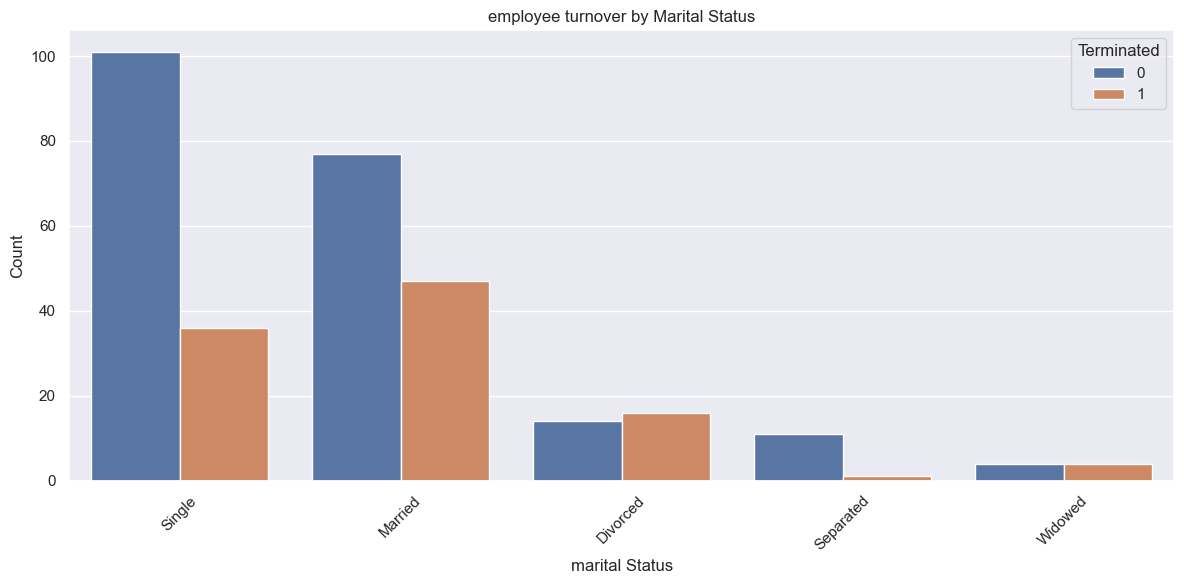

In [29]:
#countplot:turnover by Marital Status
plt.figure(figsize=(12,6))
sns.countplot(data=a,x='MaritalDesc',hue='Termd',order=a['MaritalDesc'].value_counts().index)
plt.title('employee turnover by Marital Status')
plt.xlabel('marital Status')
plt.ylabel('Count')
plt.legend(title='Terminated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('HR5')
plt.show()

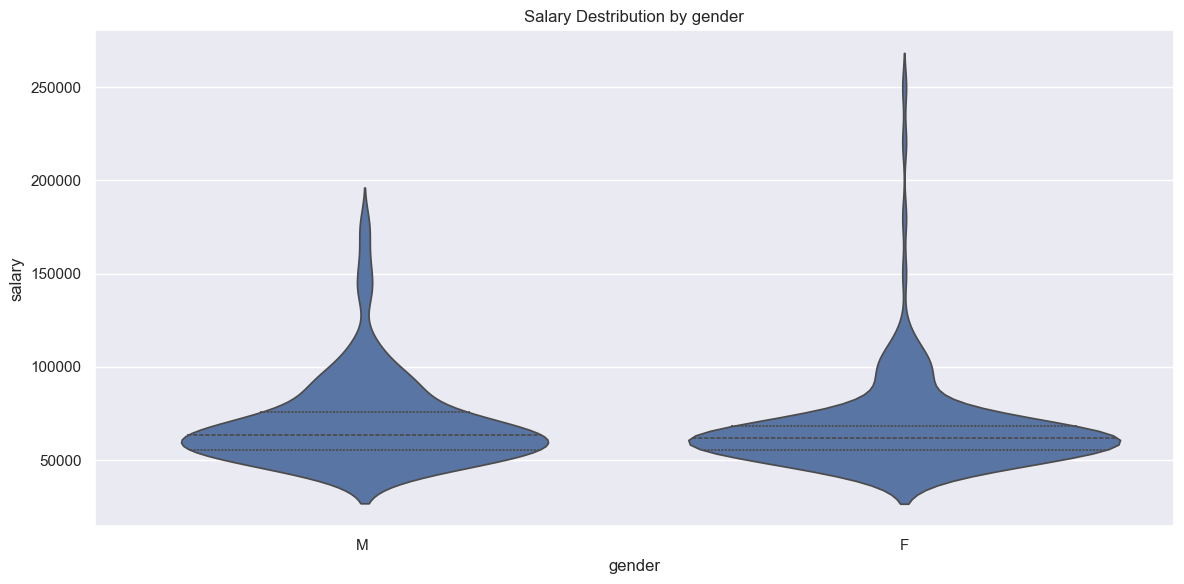

In [30]:
#violin:Salary by Gender
plt.figure(figsize=(12,6))
sns.violinplot(data=a,x='Sex',y='Salary',inner='quartile')
plt.title('Salary Destribution by gender')
plt.xlabel('gender')
plt.ylabel('salary')
plt.tight_layout()
plt.show()

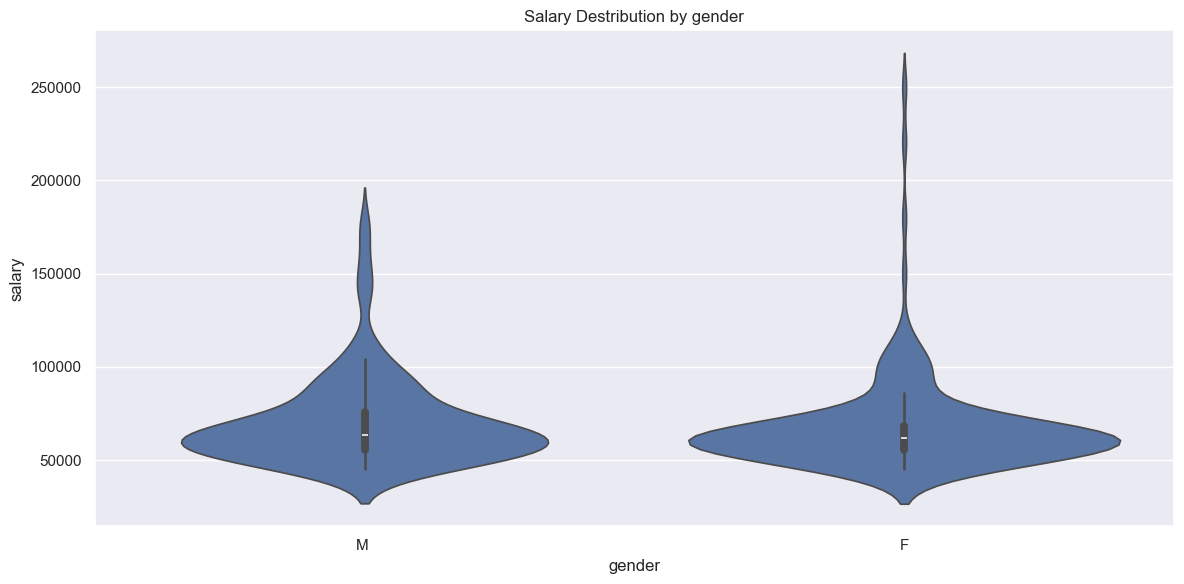

In [31]:
#violin:Salary by Gender
plt.figure(figsize=(12,6))
sns.violinplot(data=a,x='Sex',y='Salary',inner='box')
plt.title('Salary Destribution by gender')
plt.xlabel('gender')
plt.ylabel('salary')
plt.tight_layout()
plt.show()

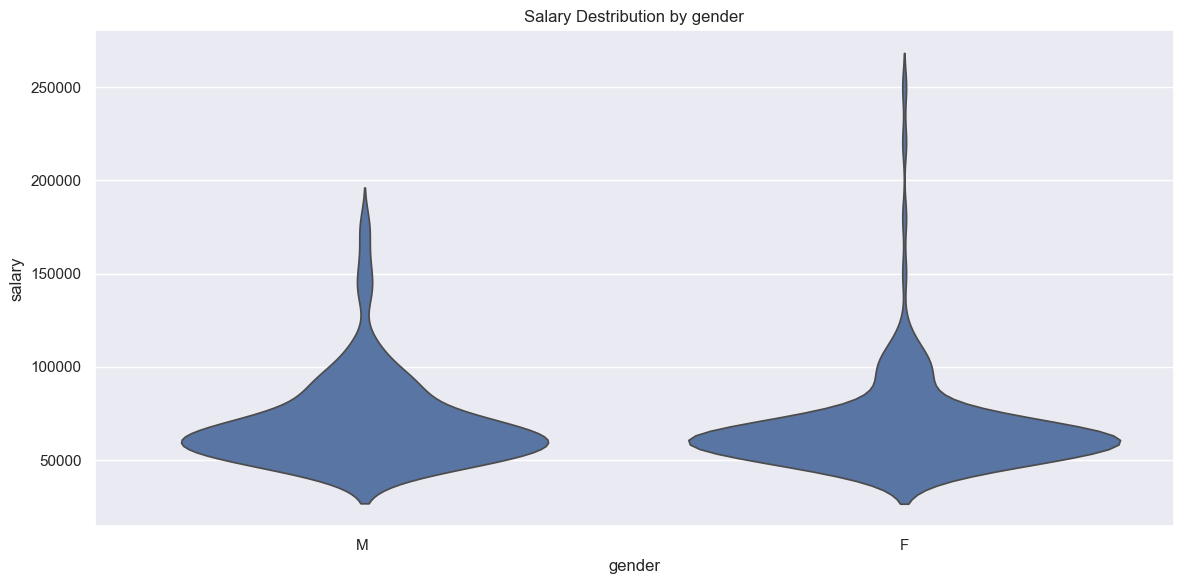

In [32]:
#violin:Salary by Gender
plt.figure(figsize=(12,6))
sns.violinplot(data=a,x='Sex',y='Salary',inner=None)
plt.title('Salary Destribution by gender')
plt.xlabel('gender')
plt.ylabel('salary')
plt.tight_layout()
plt.show()

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_17324\1335454500.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=a,x='PerformanceScore',y='Absences',estimator=np.mean,ci=None,order=a['PerformanceScore'].value_counts().index)


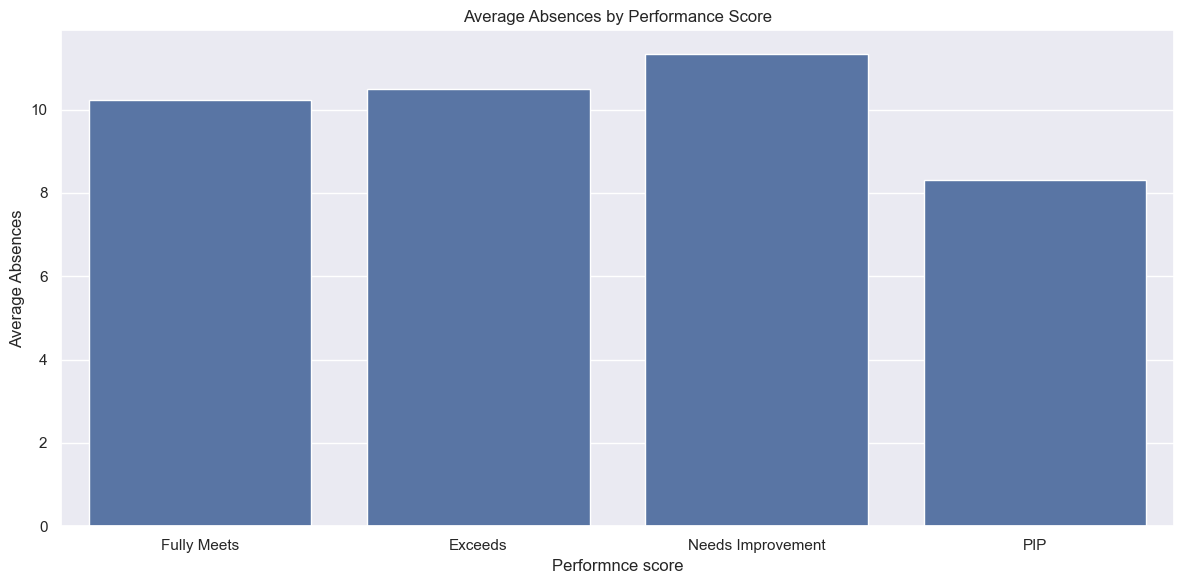

In [33]:
#bar: Average Absences by Performance Score
plt.figure(figsize=(12,6))
sns.barplot(data=a,x='PerformanceScore',y='Absences',estimator=np.mean,ci=None,order=a['PerformanceScore'].value_counts().index)
plt.title('Average Absences by Performance Score')
plt.xlabel('Performnce score')
plt.ylabel('Average Absences')
plt.tight_layout()
plt.show()

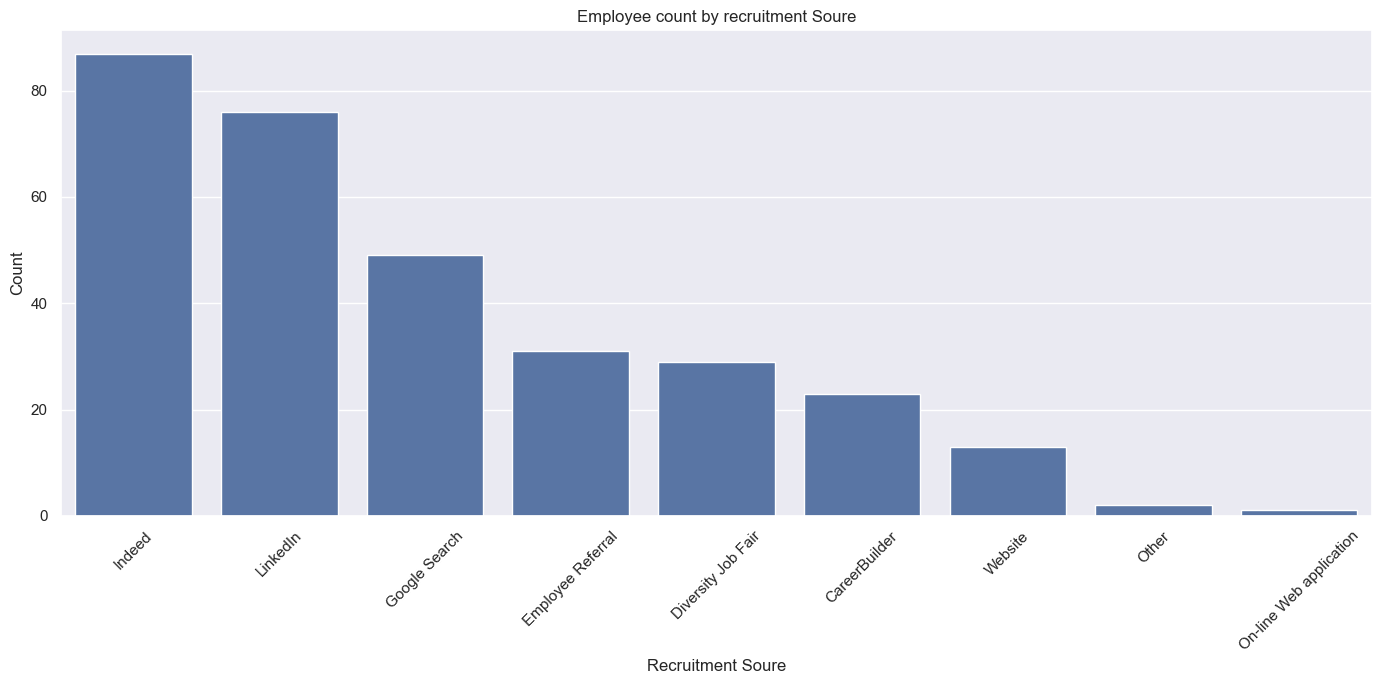

In [34]:
#calculate Employee Count by Recruitment Source
plt.figure(figsize=(14,7))
sns.countplot(data=a,x='RecruitmentSource',order=a['RecruitmentSource'].value_counts().index)
plt.title('Employee count by recruitment Soure')
plt.xlabel('Recruitment Soure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

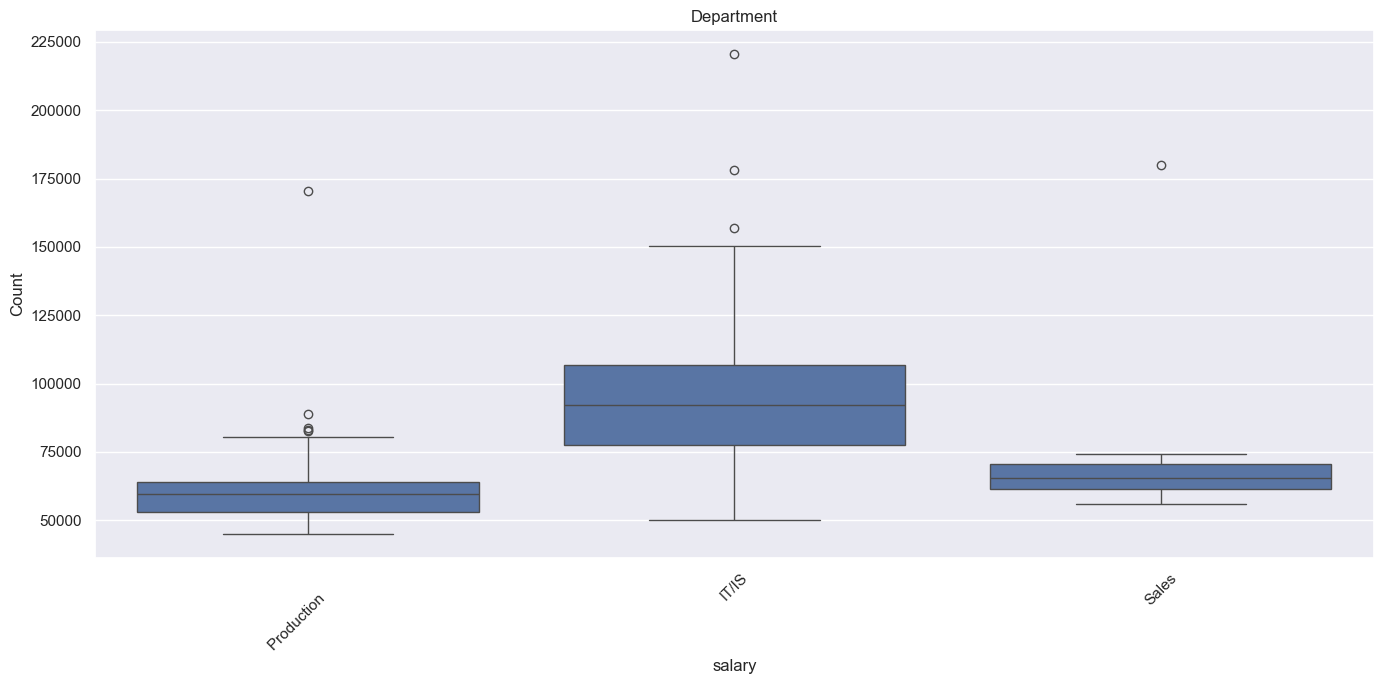

In [35]:
#box plot: salary by Department(top 3 departments)
top3=a['Department'].value_counts().index[:3]
plt.figure(figsize=(14,7))
sns.boxplot(data=a[a['Department'].isin(top3)],x='Department',y='Salary')
plt.title('Salary by Department(box plot,top 8')
plt.title('Department')
plt.xlabel('salary')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

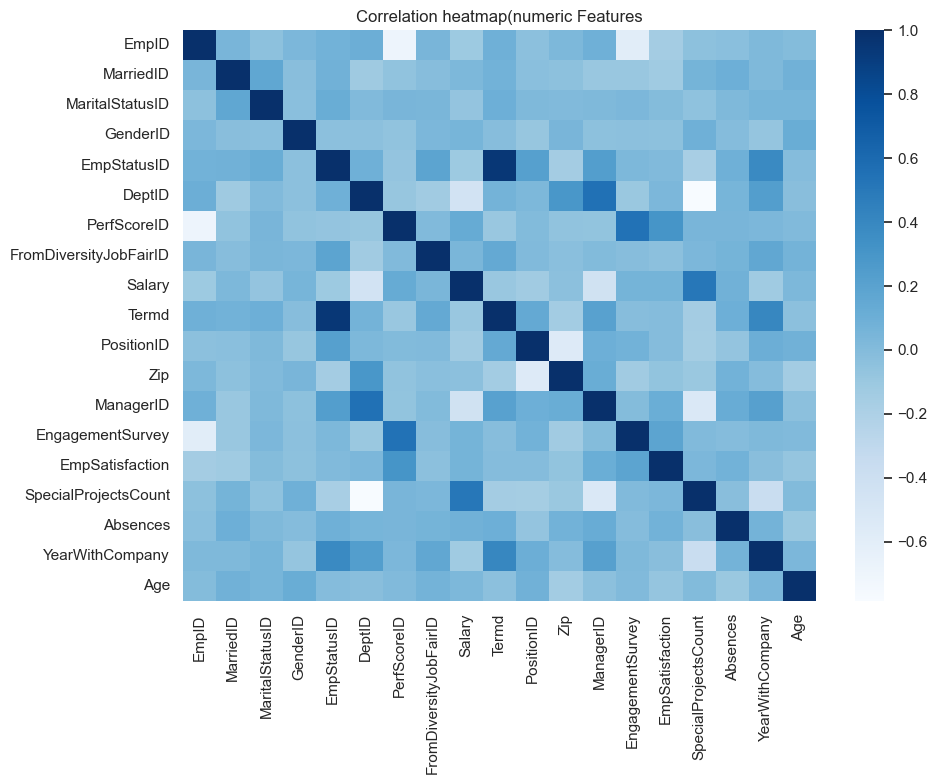

In [36]:
#correlation headmap:numeric columns
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=False,cmap='Blues')
plt.title('Correlation heatmap(numeric Features')
plt.tight_layout()
plt.show()

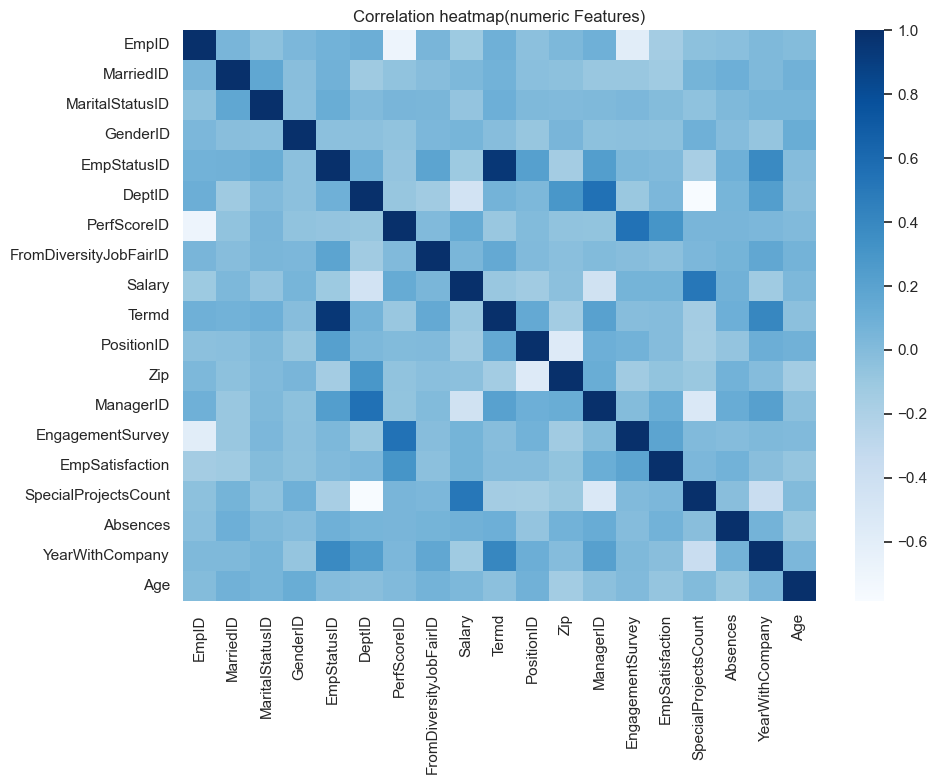

In [37]:
#correlation headmap:numeric columns
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=False,cmap='Blues')
plt.title('Correlation heatmap(numeric Features)')
plt.tight_layout()
plt.show()

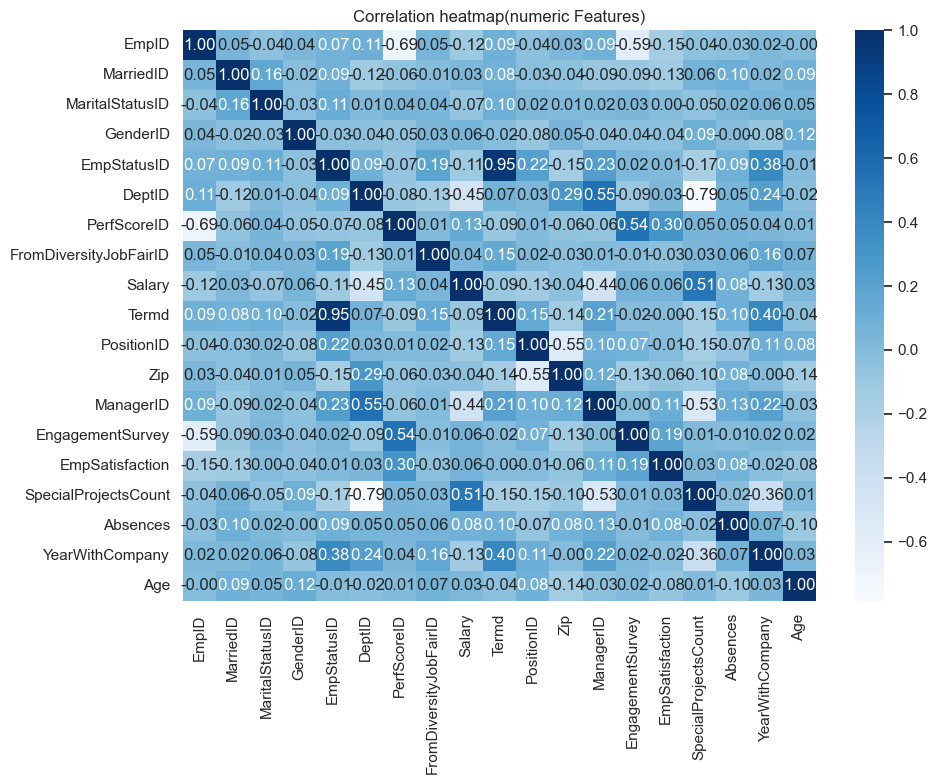

In [38]:
#correlation headmap:numeric columns
plt.figure(figsize=(10,8))
corr=a.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.2f')
plt.title('Correlation heatmap(numeric Features)')
plt.tight_layout()
plt.show()

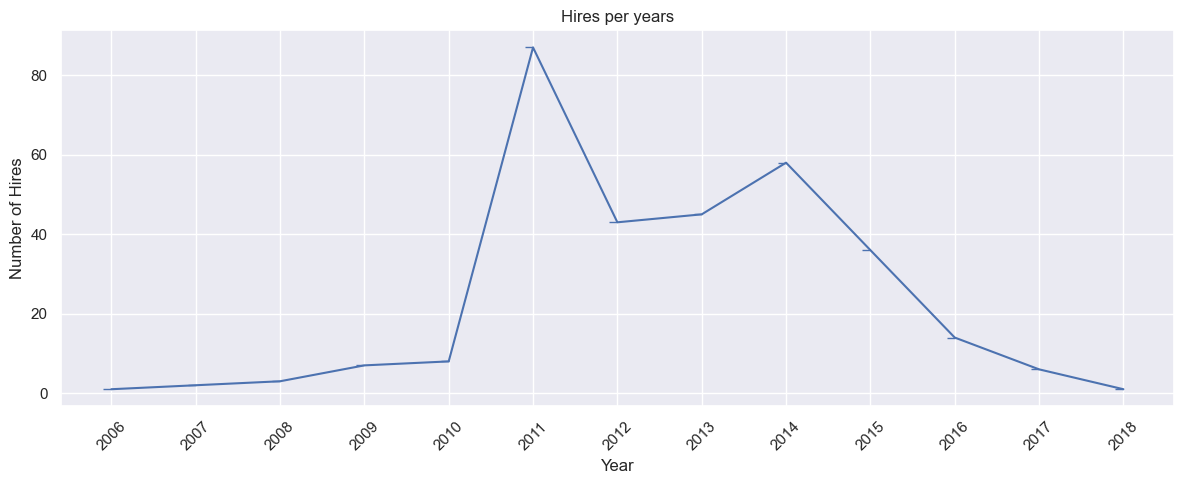

In [39]:
#line plot:Hires per year
hires_per_year=a['DateofHire'].dt.to_period('Y').value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(hires_per_year.index.astype(str),hires_per_year.values,marker=0)
plt.title('Hires per years')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
#EDA REPORT
print("\n"+"="*70)
print("EDA REPORT(SUMMARY)")
print(f"Rows:{a.shape[0]} | Columns:{a.shape[1]}")
print(f"Top Department by headcount:{a['Department'].value_counts().idxmax()}")
print(f"Most common position:{a['Position'].value_counts().idxmax()}")
print(f"Attrition Rate: {attrition_rate:.2f}%")
print(f"Average Salary:Rs.{average_salary:,.2f}")
print(f"Aevrage Age:{a['Age'].mean():.1f} | Min:{a['Age'].min():.1f} | Max:{a['Age'].max():.1f}")
print(f"Average tenure:{a['YearWithCompany'].mean():.2f}years")
print("="*70)


EDA REPORT(SUMMARY)
Rows:311 | Columns:37
Top Department by headcount:Production       
Most common position:Production Technician I
Attrition Rate: 33.44%
Average Salary:Rs.69,020.68
Aevrage Age:46.2 | Min:27.0 | Max:73.6
Average tenure:12.54years
